In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [ ]:
prev = pd.read_csv('previous_application.csv')
post = pd.read_csv('application_data.csv')

In [ ]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
post.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
post.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
prev.dtypes

,0
SK_ID_PREV,int64
SK_ID_CURR,int64
NAME_CONTRACT_TYPE,object
AMT_ANNUITY,float64
AMT_APPLICATION,float64
AMT_CREDIT,float64
AMT_DOWN_PAYMENT,float64
AMT_GOODS_PRICE,float64
WEEKDAY_APPR_PROCESS_START,object
HOUR_APPR_PROCESS_START,int64


In [ ]:
post.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [ ]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
post.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# check for missing data in each column
print(prev.isnull().sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
print(post.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [ ]:
missing_val_per_1 = (prev.isnull().sum() / len(prev)) * 100
missing_val_per_1

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000


In [ ]:
missing_val_per_2 = (post.isnull().sum() / len(post)) * 100
missing_val_per_2

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [ ]:
prev = prev.dropna()
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
598,2388655,414811,Consumer loans,14152.545,153387.0,138046.5,15340.5,153387.0,THURSDAY,9,...,Construction,12.0,middle,POS industry with interest,365243.0,-659.0,-329.0,-329.0,-323.0,0.0
21366,1184010,252161,Consumer loans,3136.275,29781.0,29781.0,0.0,29781.0,MONDAY,12,...,Construction,12.0,middle,POS industry with interest,365243.0,365243.0,349.0,365243.0,365243.0,0.0
24027,2144692,423348,Consumer loans,2640.195,26145.0,26014.5,2614.5,26145.0,THURSDAY,14,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-656.0,-326.0,-566.0,-557.0,0.0
43927,2697394,178347,Consumer loans,10324.665,101002.5,101002.5,0.0,101002.5,MONDAY,14,...,Clothing,12.0,middle,POS industry with interest,365243.0,-151.0,179.0,-61.0,-56.0,0.0
115115,2403906,268507,Consumer loans,13452.660,145800.0,131220.0,14580.0,145800.0,FRIDAY,9,...,Construction,12.0,middle,POS industry with interest,365243.0,-844.0,-514.0,-724.0,-717.0,0.0


In [ ]:
prev.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,0
AMT_APPLICATION,0
AMT_CREDIT,0
AMT_DOWN_PAYMENT,0
AMT_GOODS_PRICE,0
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [ ]:
missing1_per = (prev.isnull().sum() / len(prev)) * 100
missing1_per

,0
SK_ID_PREV,0.0
SK_ID_CURR,0.0
NAME_CONTRACT_TYPE,0.0
AMT_ANNUITY,0.0
AMT_APPLICATION,0.0
AMT_CREDIT,0.0
AMT_DOWN_PAYMENT,0.0
AMT_GOODS_PRICE,0.0
WEEKDAY_APPR_PROCESS_START,0.0
HOUR_APPR_PROCESS_START,0.0


In [ ]:
post = post.dropna()
post.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [ ]:
missing2_per = (post.isnull().sum() / len(post)) * 100
missing2_per

,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0


In [ ]:
post.fillna(method='ffill', inplace=True)
post.head()

post['CODE_GENDER'].fillna('XNA', inplace=True)
post.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


DIVISION OF DATA SET INTO TWO PARTS

In [ ]:
default = post[post['TARGET'] == 1] # had difficulties
non_default = post[post["TARGET"] == 0]

In [ ]:
default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
492,100567,1,Revolving loans,M,Y,Y,0,99000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
765,100879,1,Cash loans,F,Y,Y,0,450000.0,1323000.0,47650.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1471,101730,1,Cash loans,F,Y,N,2,90000.0,450000.0,19066.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1691,101980,1,Cash loans,F,Y,N,0,135000.0,508495.5,26091.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,0.0


In [ ]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 255 to 307407
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 505.5+ KB


In [ ]:
default.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,526.000000,526.0,526.000000,5.260000e+02,5.260000e+02,526.000000,5.260000e+02,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.0,526.0,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,285260.891635,1.0,0.541825,2.008403e+05,6.733425e+05,31509.205323,5.969036e+05,0.022182,-13664.062738,-1786.758555,...,0.007605,0.001901,0.0,0.0,0.009506,0.011407,0.051331,0.351711,0.296578,1.990494
std,103654.776718,0.0,0.723194,1.059687e+05,4.222615e+05,14351.393731,3.840907e+05,0.013536,3261.476588,1704.874811,...,0.086955,0.043602,0.0,0.0,0.097125,0.106293,0.267667,0.966026,0.686931,1.885762
min,100295.000000,1.0,0.000000,5.985000e+04,5.094000e+04,3559.500000,4.500000e+04,0.001276,-23430.000000,-11710.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193554.000000,1.0,0.000000,1.350000e+05,3.689460e+05,21654.000000,3.251250e+05,0.011657,-15624.000000,-2354.500000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,295516.500000,1.0,0.000000,1.800000e+05,5.450400e+05,30107.250000,4.545000e+05,0.020246,-13312.000000,-1232.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,374969.750000,1.0,1.000000,2.250000e+05,8.934548e+05,39448.125000,7.571250e+05,0.028663,-11129.500000,-623.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456140.000000,1.0,3.000000,1.170000e+06,2.695500e+06,85869.000000,2.250000e+06,0.072508,-7962.000000,-91.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,4.000000,10.000000,6.000000,16.000000


In [ ]:
non_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
non_default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8076 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 7.6+ MB


In [ ]:
default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

DATA ANALYSIS AND VISUALISATION OF "POST"



In [ ]:
# calculating age // feature engineering
post['AGE'] = -post['DAYS_BIRTH'] // 365
print(post[['DAYS_BIRTH', 'AGE']])


        DAYS_BIRTH  AGE
71          -15406   42
124         -16282   44
152         -11375   31
161         -13972   38
255         -11356   31
...            ...  ...
307358      -15006   41
307359      -14007   38
307407      -11407   31
307456      -20246   55
307482      -14106   38

[8602 rows x 2 columns]


TARGET      0     1
AGE                
21       18.0   1.0
22       42.0   5.0
23       89.0   8.0
24      109.0   6.0
25      141.0  17.0
26      142.0  12.0
27      281.0  31.0
28      273.0  25.0
29      287.0  18.0
30      293.0  24.0
31      319.0  28.0
32      365.0  20.0
33      320.0  20.0
34      333.0  16.0
35      322.0  21.0
36      316.0  23.0
37      334.0  22.0
38      362.0  34.0
39      331.0  16.0
40      308.0  20.0
41      310.0  13.0
42      284.0  16.0
43      280.0  11.0
44      242.0  18.0
45      208.0   5.0
46      223.0  10.0
47      170.0  10.0
48      174.0   9.0
49      137.0   7.0
50      148.0   5.0
51      129.0  10.0
52      121.0   6.0
53      135.0  11.0
54      109.0   7.0
55       82.0   3.0
56       75.0   5.0
57       72.0   3.0
58       40.0   3.0
59       58.0   2.0
60       19.0   2.0
61       19.0   1.0
62       11.0   NaN
63       24.0   1.0
64       11.0   1.0
65        7.0   NaN
66        1.0   NaN
68        2.0   NaN


<Figure size 2000x1500 with 0 Axes>

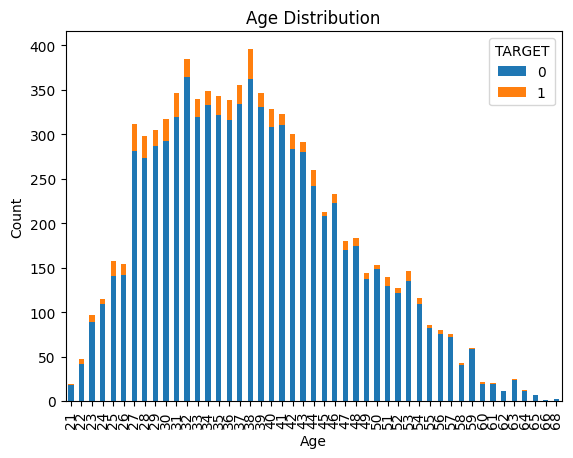

In [ ]:
# AGE

age = post.groupby('AGE')['TARGET'].value_counts().unstack()
print(age)

plt.figure(figsize=(20,15))
age.plot(kind='bar', stacked=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

TARGET          0    1
CODE_GENDER           
F            3997  224
M            4079  302


Text(0, 0.5, 'Count')

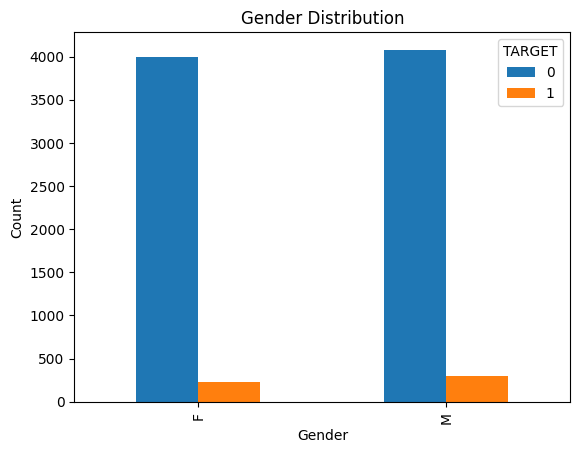

In [ ]:
# GENDER
post = post[post['CODE_GENDER'] != 'XNA']
gender = post.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()
print(gender)

gender.plot(kind='bar', stacked=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')



TARGET                              0      1
NAME_EDUCATION_TYPE                         
Academic degree                   6.0    NaN
Higher education               3364.0  159.0
Incomplete higher               370.0   22.0
Lower secondary                  32.0    3.0
Secondary / secondary special  4304.0  342.0


Text(0, 0.5, 'Count')

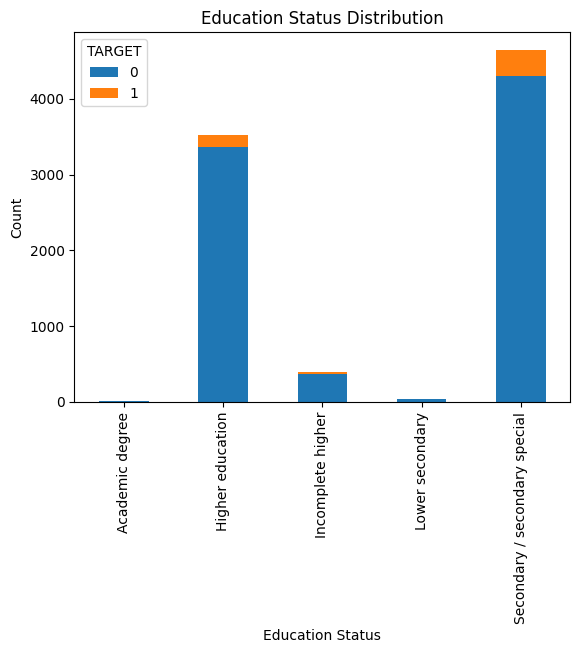

In [ ]:
# EDUCATION STATUS

edu =  post.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts().unstack()
print(edu)

edu.plot(kind='bar', stacked=True)
plt.title('Education Status Distribution')
plt.xlabel('Education Status')
plt.ylabel('Count')

TARGET                   0    1
NAME_INCOME_TYPE               
Commercial associate  2683  153
State servant          680   36
Working               4713  337


Text(0, 0.5, 'Count')

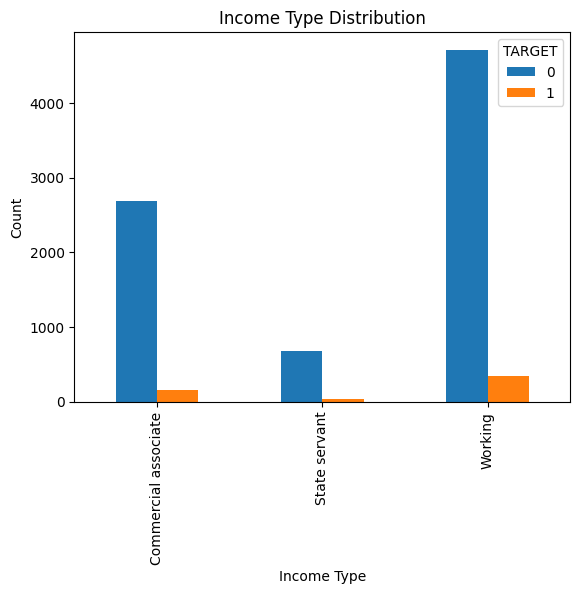

In [ ]:
# INCOME TYPE // bu boyle gosterilmez
income_type = post.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack()
print(income_type)

income_type.plot(kind='bar', stacked=False)
plt.title('Income Type Distribution')
plt.xlabel('Income Type')
plt.ylabel('Count')

TARGET              0   1
AMT_INCOME_TOTAL         
33750.0           1.0 NaN
38250.0           1.0 NaN
40500.0           1.0 NaN
45000.0           3.0 NaN
49500.0           2.0 NaN
...               ...  ..
1575000.0         2.0 NaN
1800000.0         1.0 NaN
2025000.0         2.0 NaN
2475000.0         1.0 NaN
4500000.0         1.0 NaN

[266 rows x 2 columns]


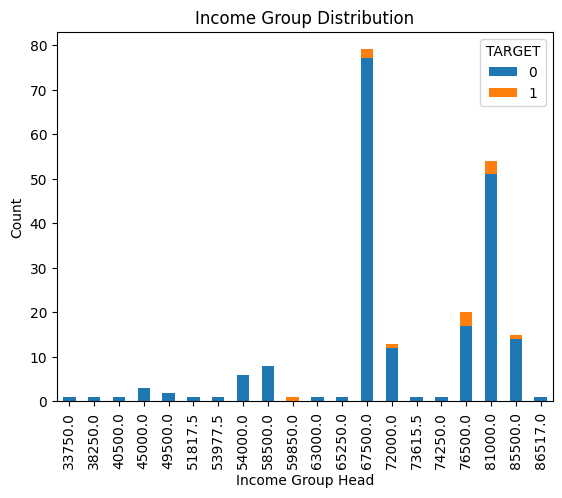

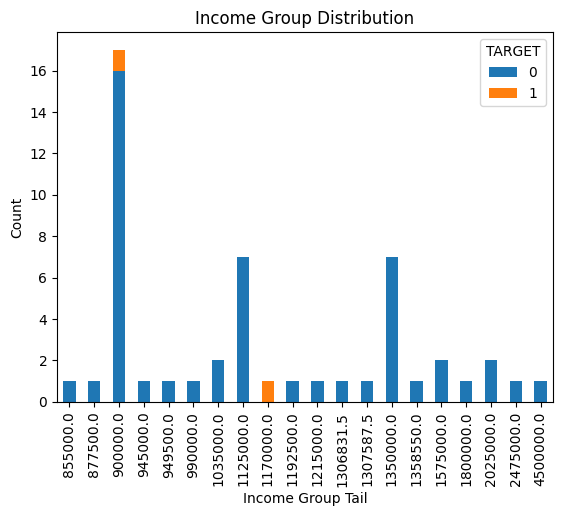

In [ ]:
# income group
income_group = post.groupby('AMT_INCOME_TOTAL')['TARGET'].value_counts().unstack()
print(income_group)


income_group.head(20).plot(kind='bar', stacked=True)
plt.title('Income Group Distribution')
plt.xlabel('Income Group Head')
plt.ylabel('Count')

income_group.tail(20).plot(kind='bar', stacked=True)
plt.title('Income Group Distribution')
plt.xlabel('Income Group Tail')
plt.ylabel('Count')
plt.show()

TARGET                   0    1
NAME_FAMILY_STATUS             
Civil marriage         669   64
Married               5796  343
Separated              437   33
Single / not married  1077   82
Widow                   97    4


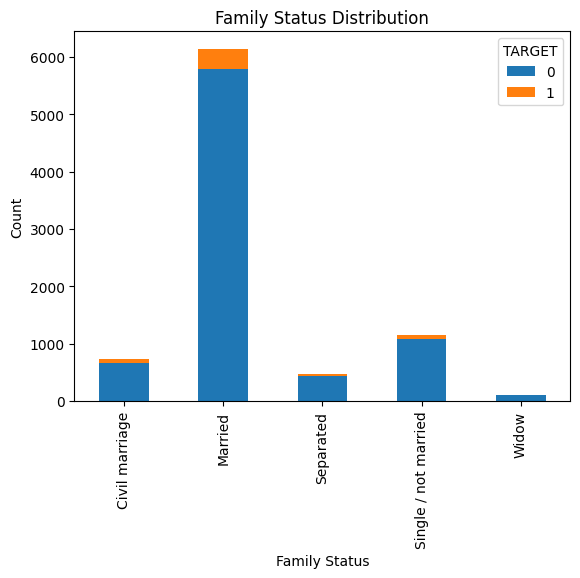

In [ ]:
# FAMILY STATUS

family_status = post.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack()
print(family_status)

family_status.plot(kind='bar', stacked=True)
plt.title('Family Status Distribution')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()

TARGET                  0    1
NAME_HOUSING_TYPE             
Co-op apartment        31    4
House / apartment    7201  447
Municipal apartment   233   23
Office apartment      105    5
Rented apartment       95    3
With parents          411   44


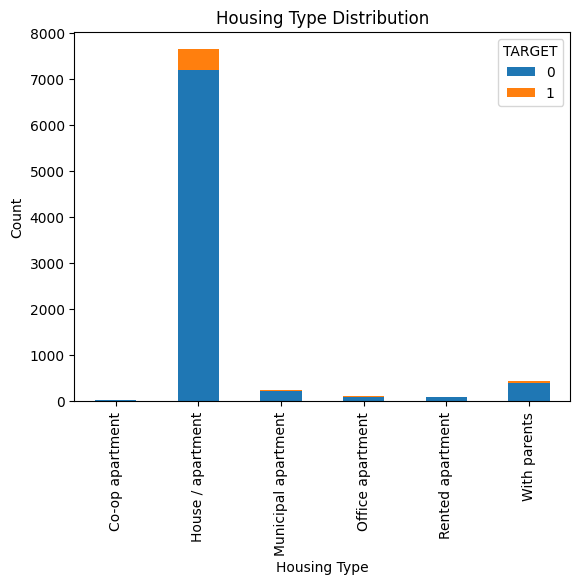

In [ ]:
# HOUSING TYPE

housing_type = post.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().unstack()
print(housing_type)

housing_type.plot(kind='bar', stacked=True)
plt.title('Housing Type Distribution')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.show()


In [ ]:
post['HOUSING_TYPE'] = post['NAME_HOUSING_TYPE']
post['HOUSING_TYPE#'] = post['NAME_HOUSING_TYPE'].astype('category').cat.codes
post.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,HOUSING_TYPE,HOUSING_TYPE#
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,42,House / apartment,1
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,44,House / apartment,1
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0.0,0.0,0.0,1.0,0.0,4.0,31,House / apartment,1
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,38,House / apartment,1
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,0,0.0,0.0,0.0,6.0,0.0,1.0,31,House / apartment,1


TARGET                    0    1
OCCUPATION_TYPE                 
Accountants             541   20
Cleaning staff           43    3
Cooking staff            92    6
Core staff             1119   47
Drivers                 868   72
HR staff                 27    1
High skill tech staff   586   32
IT staff                 41    3
Laborers               1812  155
Low-skill Laborers       30    3
Managers               1474   76
Medicine staff          207   10
Private service staff    98    4
Realty agents            38    3
Sales staff             875   72
Secretaries              43    1
Security staff          156   15
Waiters/barmen staff     26    3


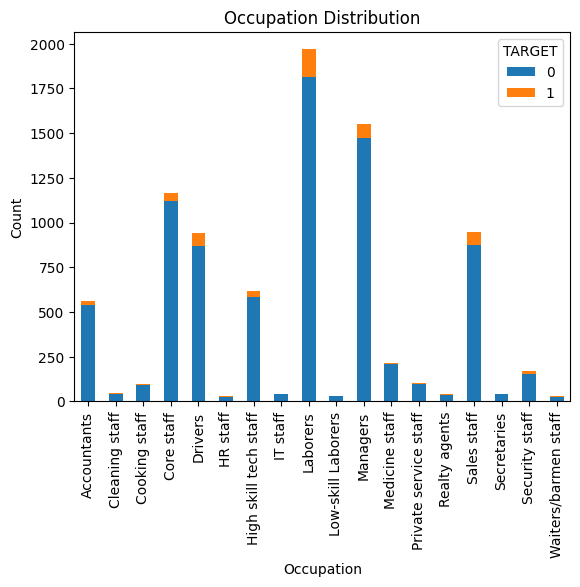

In [ ]:
# occupation

occupation = post.groupby('OCCUPATION_TYPE')['TARGET'].value_counts().unstack()
print(occupation)

occupation.plot(kind='bar', stacked=True)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

TARGET                 0    1
NAME_CONTRACT_TYPE           
Cash loans          7162  498
Revolving loans      914   28


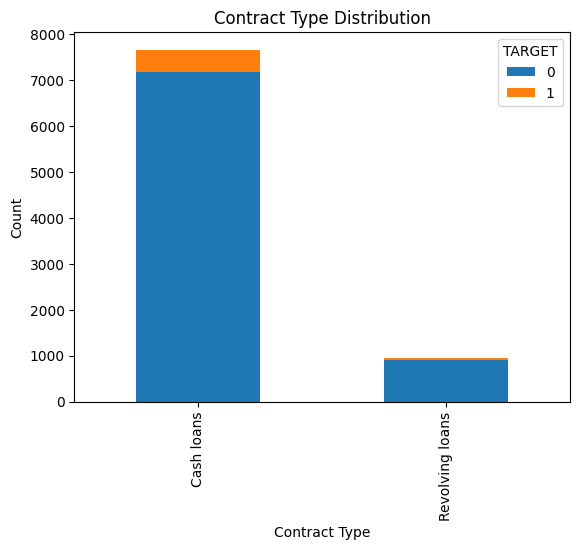

In [ ]:
# contract type

contract_type = post.groupby('NAME_CONTRACT_TYPE')['TARGET'].value_counts().unstack()
print(contract_type)

contract_type.plot(kind='bar', stacked=True)
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

TARGET        0    1
AMT_CREDIT          
45000.0     5.0  NaN
47970.0     1.0  NaN
49752.0     1.0  NaN
50940.0     7.0  1.0
52128.0     3.0  NaN
...         ...  ...
2695500.0   6.0  1.0
2931660.0   1.0  NaN
3150000.0   1.0  NaN
3299688.0   1.0  NaN
4050000.0   1.0  NaN

[1806 rows x 2 columns]


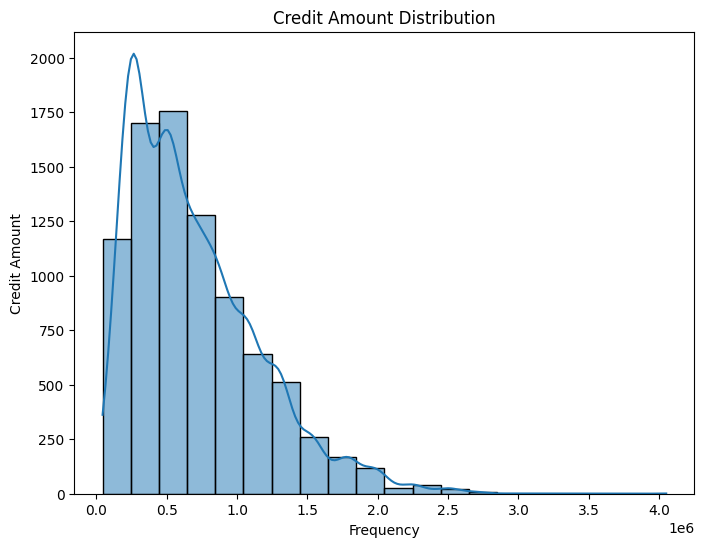

In [ ]:
credit_amount = post.groupby('AMT_CREDIT')['TARGET'].value_counts().unstack()
print(credit_amount)
plt.figure(figsize=(8, 6))
sns.histplot(post['AMT_CREDIT'], bins=20, kde=True)
plt.title('Credit Amount Distribution')
plt.ylabel('Credit Amount')
plt.xlabel('Frequency')
plt.show()

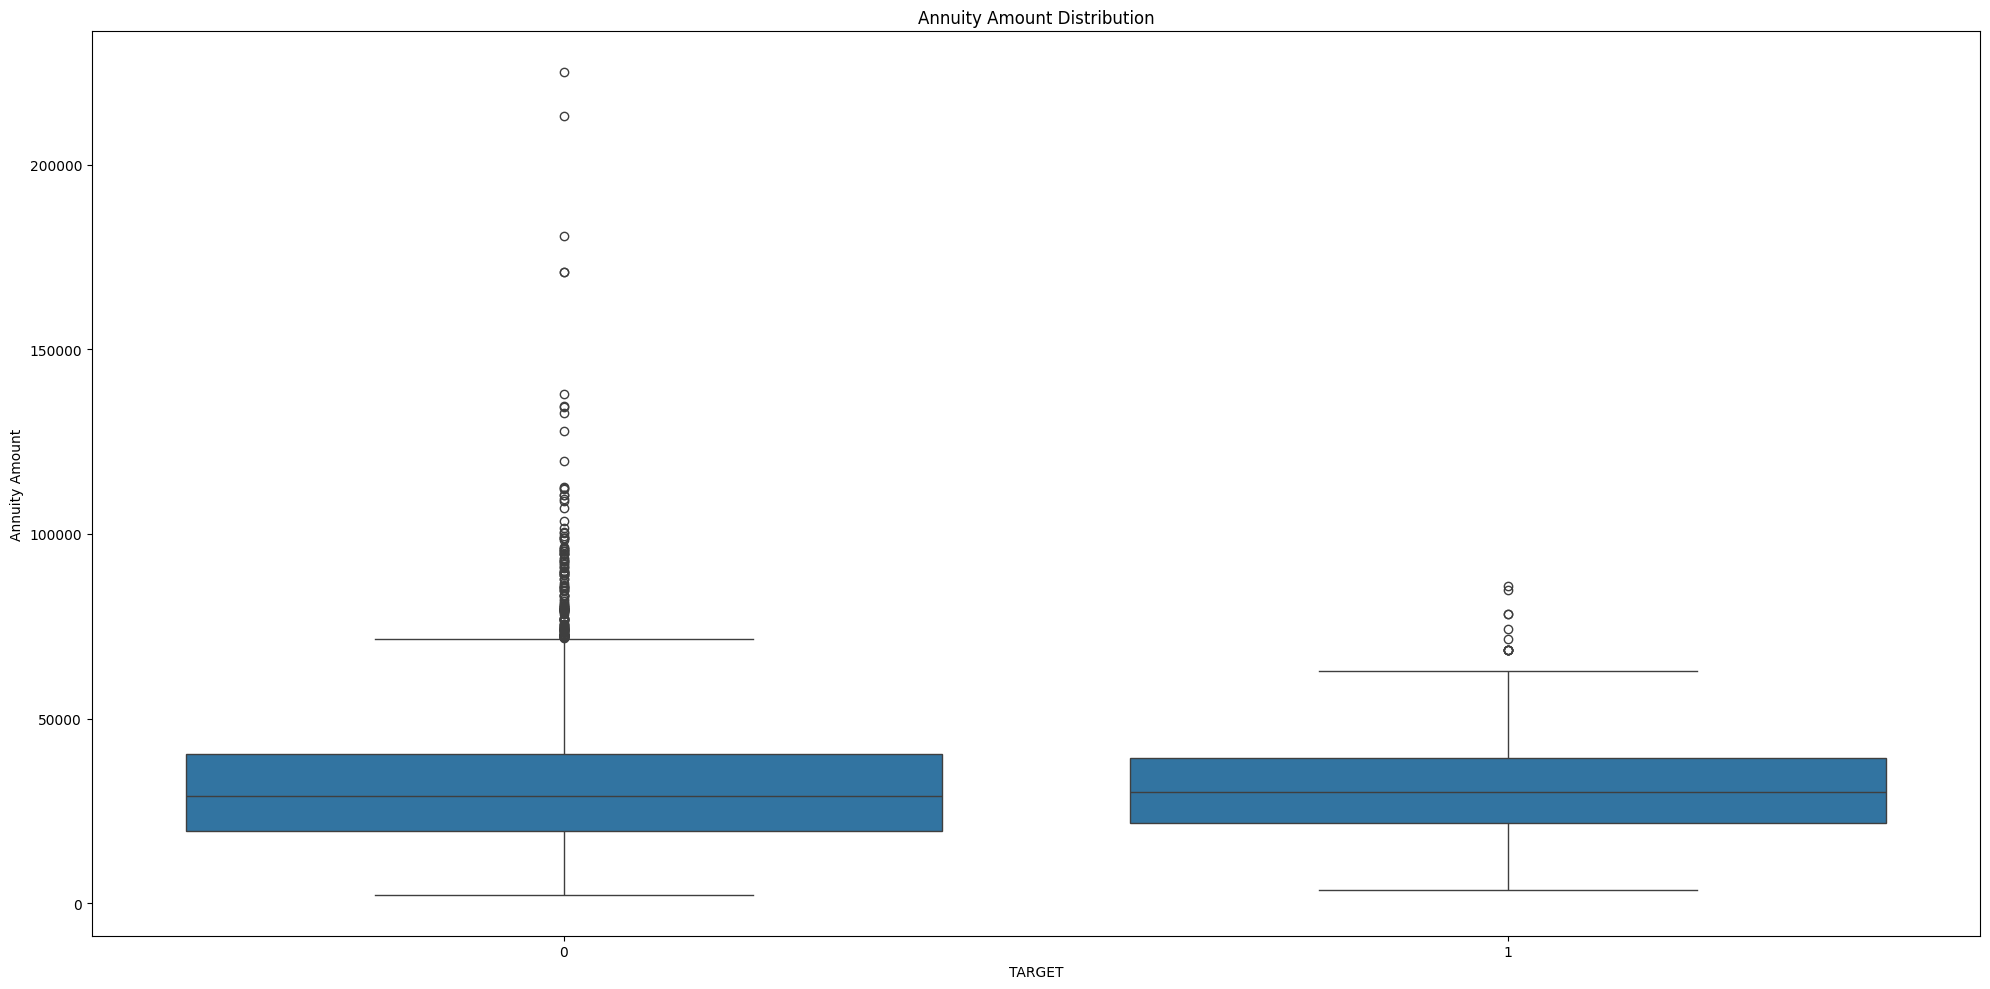

In [ ]:
# annuity amount

plt.figure(figsize=[20,10])

sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=post)
plt.title('Annuity Amount Distribution')
plt.xlabel('TARGET')
plt.ylabel('Annuity Amount')

plt.tight_layout()
plt.show()

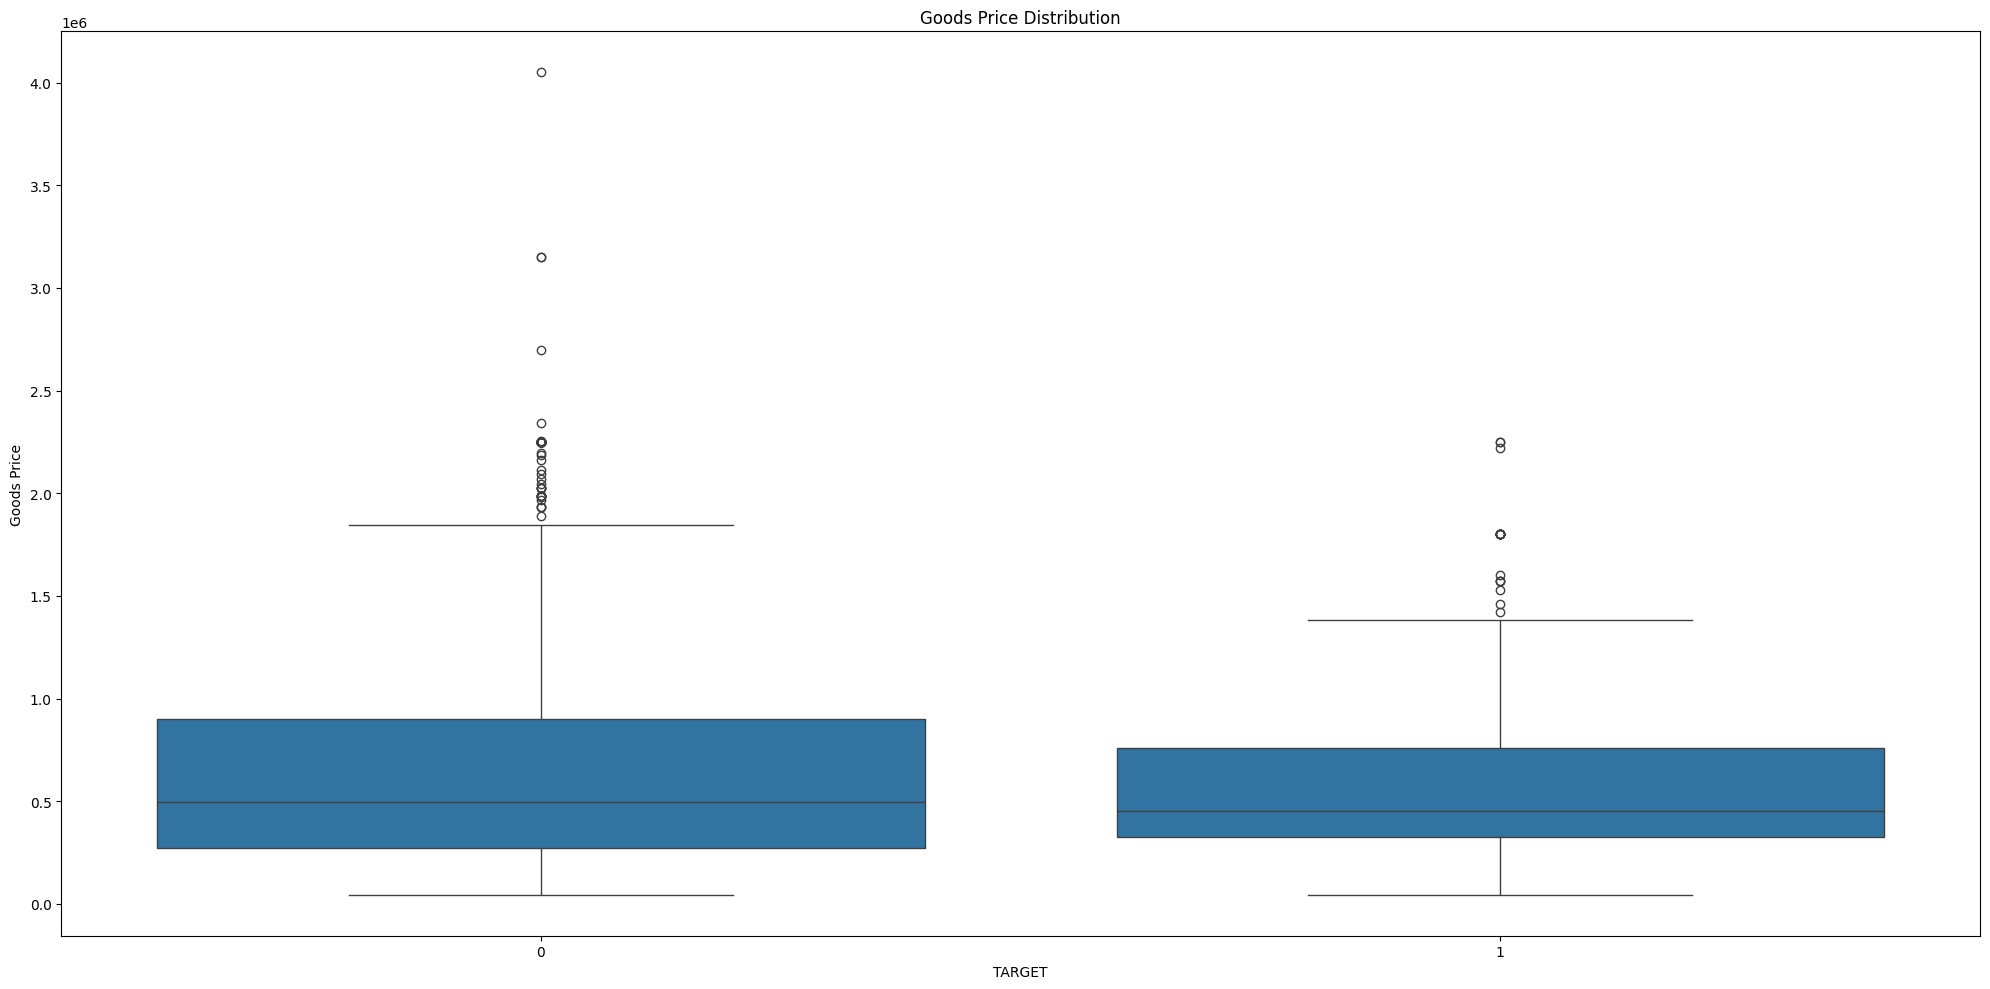

In [ ]:
# goods price distribution
plt.figure(figsize=[20,10])

sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=post)
plt.title('Goods Price Distribution')
plt.xlabel('TARGET')
plt.ylabel('Goods Price')

plt.tight_layout()
plt.show()

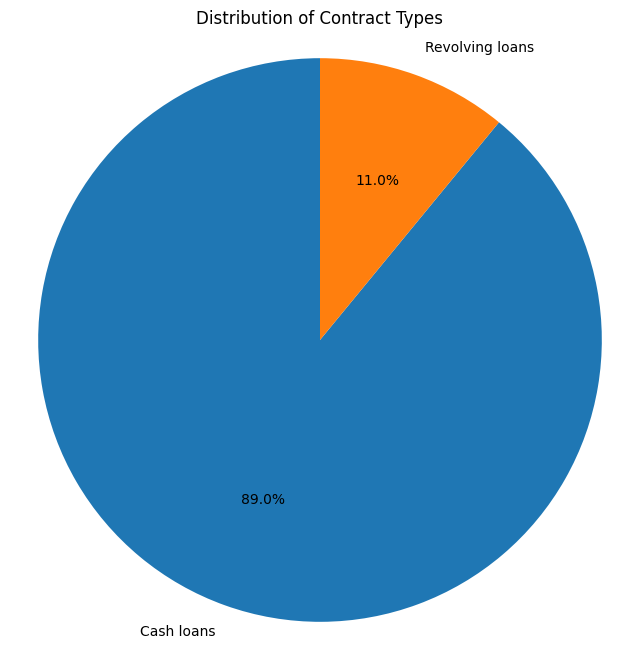

In [ ]:

contract_counts = post['NAME_CONTRACT_TYPE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Contract Types')
plt.axis('equal')
plt.show()


In [ ]:
post.columns
if 'AMT_APPLICATTON' in post.columns:
    print("Column exists")
else:
  print("Does not exist")

Does not exist


In [ ]:
annual_income = post.groupby("AMT_INCOME_TOTAL")["TARGET"].value_counts().unstack()
print(annual_income)

TARGET              0   1
AMT_INCOME_TOTAL         
33750.0           1.0 NaN
38250.0           1.0 NaN
40500.0           1.0 NaN
45000.0           3.0 NaN
49500.0           2.0 NaN
...               ...  ..
1575000.0         2.0 NaN
1800000.0         1.0 NaN
2025000.0         2.0 NaN
2475000.0         1.0 NaN
4500000.0         1.0 NaN

[266 rows x 2 columns]


In [ ]:
numeric_data = post.select_dtypes(include=np.number)
numeric_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,HOUSING_TYPE#
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42,1
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,44,1
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0.0,0.0,0.0,1.0,0.0,4.0,31,1
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38,1
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,0,0,0.0,0.0,0.0,6.0,0.0,1.0,31,1


In [ ]:
post.isnull().sum()
post

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,HOUSING_TYPE,HOUSING_TYPE#
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,42,House / apartment,1
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,44,House / apartment,1
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0.0,0.0,0.0,1.0,0.0,4.0,31,House / apartment,1
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,38,House / apartment,1
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,0,0.0,0.0,0.0,6.0,0.0,1.0,31,House / apartment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0.0,0.0,0.0,2.0,0.0,0.0,41,House / apartment,1
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,38,House / apartment,1
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0.0,0.0,0.0,1.0,0.0,1.0,31,House / apartment,1
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,55,House / apartment,1


In [ ]:
post_dropped = post.dropna()
post_dropped

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,HOUSING_TYPE,HOUSING_TYPE#
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,42,House / apartment,1
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,44,House / apartment,1
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0.0,0.0,0.0,1.0,0.0,4.0,31,House / apartment,1
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,38,House / apartment,1
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,0,0.0,0.0,0.0,6.0,0.0,1.0,31,House / apartment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0.0,0.0,0.0,2.0,0.0,0.0,41,House / apartment,1
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,38,House / apartment,1
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0.0,0.0,0.0,1.0,0.0,1.0,31,House / apartment,1
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,55,House / apartment,1


A simple linear regression model

Mean squared error: 94038873532.07123
R-squared: 0.5610474029402006


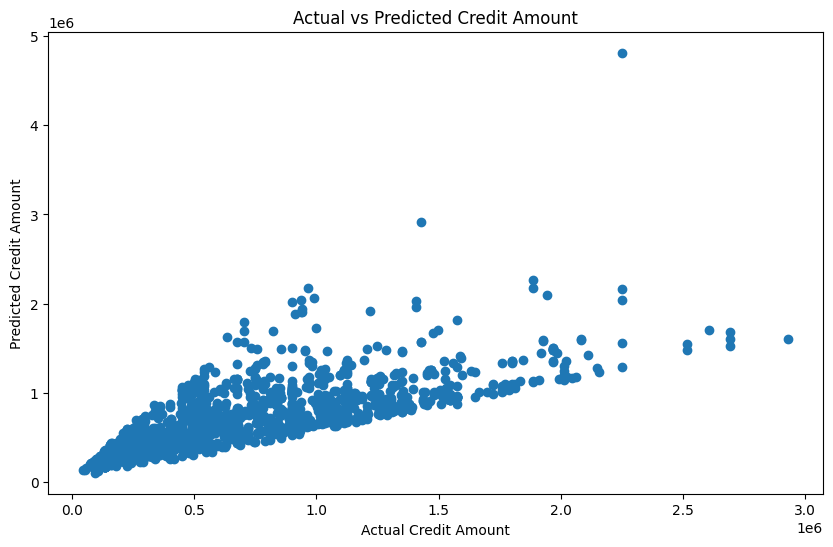

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

features = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'CNT_CHILDREN']
x = post_dropped[features]
y = post_dropped["AMT_CREDIT"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Credit Amount")
plt.ylabel("Predicted Credit Amount")
plt.title("Actual vs Predicted Credit Amount")
plt.show()

In [ ]:
post.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'HOUSING_TYPE', 'HOUSING_TYPE#'],
      dtype='object', length=125)

STATISTICAL ANALYSIS

In [ ]:
from scipy import stats

In [ ]:
# two sample t- test, credit amounts of default and non_default loaners
group1 = post[post['TARGET'] == 0]['AMT_CREDIT']
group2 = post[post['TARGET'] == 1]['AMT_CREDIT']

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T.statistic: {t_stat}, P-value: {p_value}")

T.statistic: 1.3572008503729496, P-value: 0.17475301721429964


In [ ]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
598,2388655,414811,Consumer loans,14152.545,153387.0,138046.5,15340.5,153387.0,THURSDAY,9,...,Construction,12.0,middle,POS industry with interest,365243.0,-659.0,-329.0,-329.0,-323.0,0.0
21366,1184010,252161,Consumer loans,3136.275,29781.0,29781.0,0.0,29781.0,MONDAY,12,...,Construction,12.0,middle,POS industry with interest,365243.0,365243.0,349.0,365243.0,365243.0,0.0
24027,2144692,423348,Consumer loans,2640.195,26145.0,26014.5,2614.5,26145.0,THURSDAY,14,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-656.0,-326.0,-566.0,-557.0,0.0
43927,2697394,178347,Consumer loans,10324.665,101002.5,101002.5,0.0,101002.5,MONDAY,14,...,Clothing,12.0,middle,POS industry with interest,365243.0,-151.0,179.0,-61.0,-56.0,0.0
115115,2403906,268507,Consumer loans,13452.660,145800.0,131220.0,14580.0,145800.0,FRIDAY,9,...,Construction,12.0,middle,POS industry with interest,365243.0,-844.0,-514.0,-724.0,-717.0,0.0


In [ ]:
prev.duplicated().sum()

0

In [ ]:
post.duplicated().sum()

0

In [ ]:
if 'AMT_APPLICATION' in post.columns:
  print("exists")
else:
  print("does not exist")

post = pd.read_csv("application_data.csv")
print(post.head())

does not exist
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                

In [ ]:
# ANOVA

group1 = post[post['TARGET'] == 0]['AMT_CREDIT']
group2 = post[post['TARGET'] == 1]['AMT_CREDIT']

F_statistic, p_value = stats.f_oneway(group1, group2)

print(f"F-statistic: {F_statistic}")
print(f"P-value: {p_value}")


F-statistic: 283.8753868374507
P-value: 1.1474602724260586e-63


In [ ]:
post['AMT_CREDIT'].corr(post['AMT_GOODS_PRICE'])

0.9869683054221501

In [ ]:
post['AMT_CREDIT'].corr(post['AMT_ANNUITY'])

0.7701380033118824

In [ ]:
post2 = post.select_dtypes(include=np.number).corr()
post2

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [ ]:
variables = post[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',]]
matrix = variables.corr()
print(matrix)

                  AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN
AMT_CREDIT          1.000000          0.156870      0.002145
AMT_INCOME_TOTAL    0.156870          1.000000      0.012882
CNT_CHILDREN        0.002145          0.012882      1.000000


                  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_GOODS_PRICE  AMT_ANNUITY
AMT_CREDIT          1.000000          0.156870         0.986968     0.770138
AMT_INCOME_TOTAL    0.156870          1.000000         0.159610     0.191657
AMT_GOODS_PRICE     0.986968          0.159610         1.000000     0.775109
AMT_ANNUITY         0.770138          0.191657         0.775109     1.000000


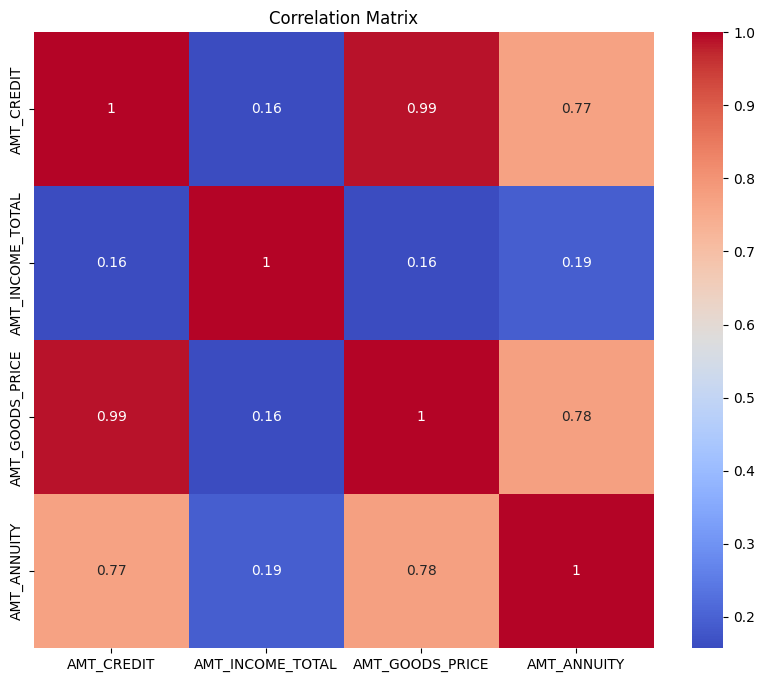

In [ ]:
variables2 = post[['AMT_CREDIT','AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']]
matrix2 = variables2.corr()
print(matrix2)

plt.figure(figsize=(10,8))
sns.heatmap(matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
prev_numerical = prev.select_dtypes(include=np.number)
corr_matrix1 = prev_numerical.corr()
print(corr_matrix1)

                           SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.002514    -0.062103   
SK_ID_CURR                  -0.002514    1.000000     0.085439   
AMT_ANNUITY                 -0.062103    0.085439     1.000000   
AMT_APPLICATION             -0.065285    0.113620     0.986229   
AMT_CREDIT                  -0.061630    0.086436     0.999939   
AMT_DOWN_PAYMENT            -0.017276    0.175086     0.775581   
AMT_GOODS_PRICE             -0.065285    0.113620     0.986229   
HOUR_APPR_PROCESS_START      0.098916   -0.112946    -0.048648   
NFLAG_LAST_APPL_IN_DAY            NaN         NaN          NaN   
RATE_DOWN_PAYMENT           -0.022402    0.147016     0.072657   
RATE_INTEREST_PRIMARY        0.096463    0.105772    -0.220981   
RATE_INTEREST_PRIVILEGED     0.101816    0.154202    -0.146728   
DAYS_DECISION               -0.057981    0.208837    -0.101702   
SELLERPLACE_AREA            -0.183640   -0.052637     0.113311   
CNT_PAYMEN

In [ ]:
# t- test
group1 = post[post['TARGET'] == 0]['AMT_CREDIT']
group2 = post[post['TARGET'] == 1]['AMT_CREDIT']

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T.statistic: {t_stat}, P-value: {p_value}")


T.statistic: 16.848601925306788, P-value: 1.1474602724788813e-63


                           SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.002514    -0.062103   
SK_ID_CURR                  -0.002514    1.000000     0.085439   
AMT_ANNUITY                 -0.062103    0.085439     1.000000   
AMT_APPLICATION             -0.065285    0.113620     0.986229   
AMT_CREDIT                  -0.061630    0.086436     0.999939   
AMT_DOWN_PAYMENT            -0.017276    0.175086     0.775581   
AMT_GOODS_PRICE             -0.065285    0.113620     0.986229   
HOUR_APPR_PROCESS_START      0.098916   -0.112946    -0.048648   
NFLAG_LAST_APPL_IN_DAY            NaN         NaN          NaN   
RATE_DOWN_PAYMENT           -0.022402    0.147016     0.072657   
RATE_INTEREST_PRIMARY        0.096463    0.105772    -0.220981   
RATE_INTEREST_PRIVILEGED     0.101816    0.154202    -0.146728   
DAYS_DECISION               -0.057981    0.208837    -0.101702   
SELLERPLACE_AREA            -0.183640   -0.052637     0.113311   
CNT_PAYMEN

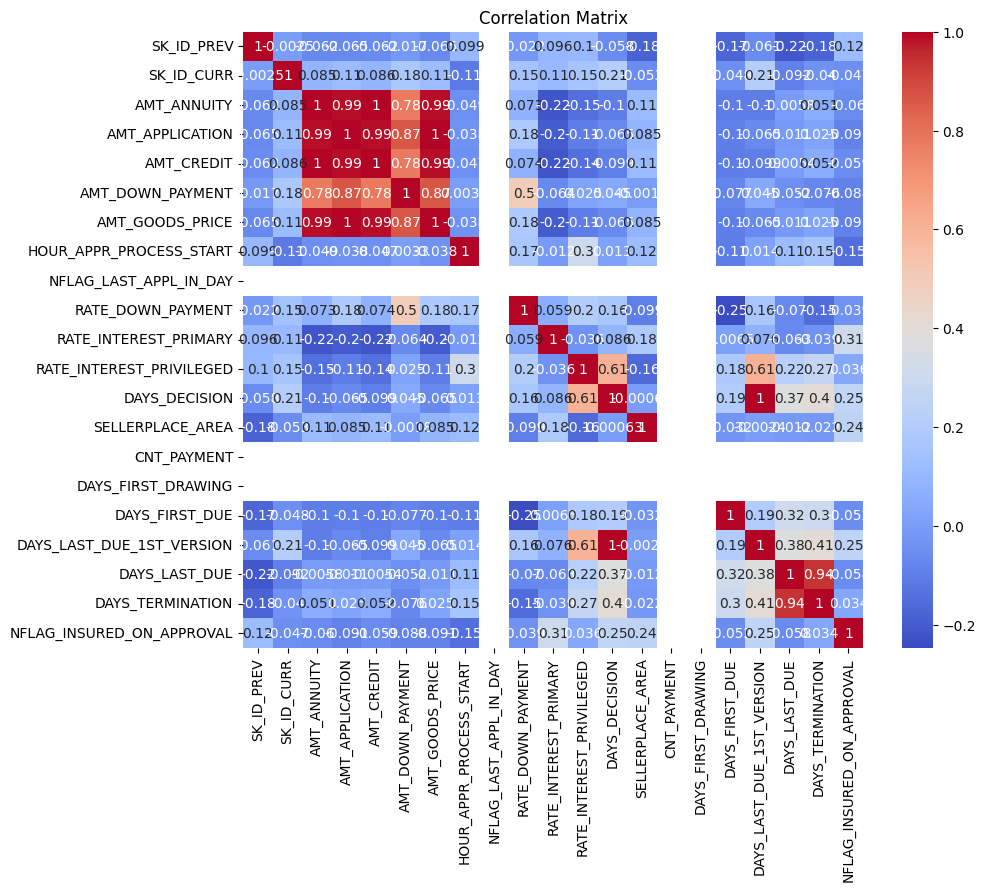

In [ ]:
prev_numerical = prev.select_dtypes(include=np.number)
corr_matrix1 = prev_numerical.corr()
print(corr_matrix1)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

PLAYGROUND


In [ ]:
amt_income = post.groupby('AMT_INCOME_TOTAL')['TARGET'].value_counts().unstack()
print(amt_income)

TARGET               0    1
AMT_INCOME_TOTAL           
25650.0            1.0  1.0
26100.0            3.0  NaN
26460.0            1.0  NaN
26550.0            2.0  NaN
27000.0           63.0  3.0
...                ...  ...
6750000.0          1.0  NaN
9000000.0          1.0  NaN
13500000.0         1.0  NaN
18000090.0         1.0  NaN
117000000.0        NaN  1.0

[2548 rows x 2 columns]


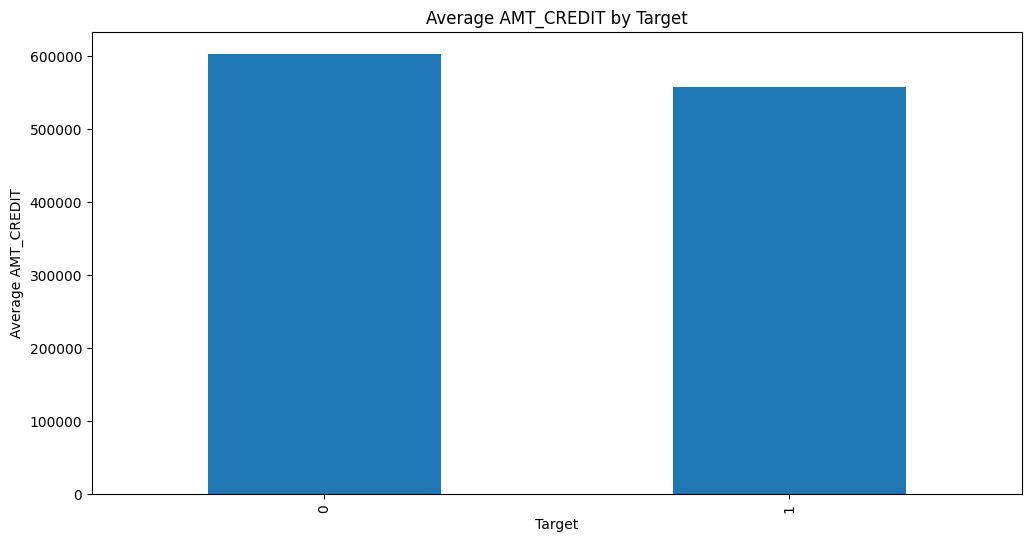

In [ ]:

plt.figure(figsize=(12, 6))
post.groupby('TARGET')['AMT_CREDIT'].mean().plot(kind='bar')
plt.title('Average AMT_CREDIT by Target')
plt.xlabel('Target')
plt.ylabel('Average AMT_CREDIT')
plt.show()


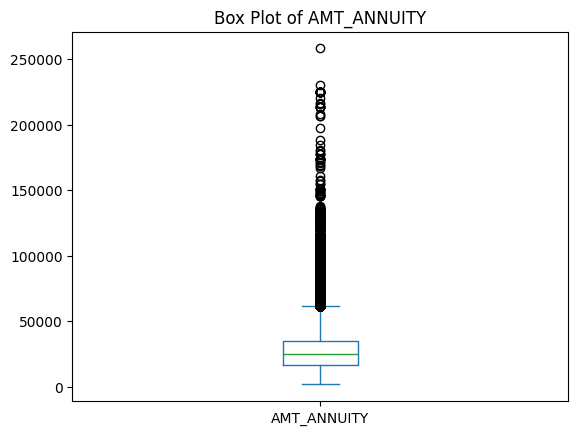

In [ ]:
post['AMT_ANNUITY'].plot(kind='box')
plt.title('Box Plot of AMT_ANNUITY')
plt.show()

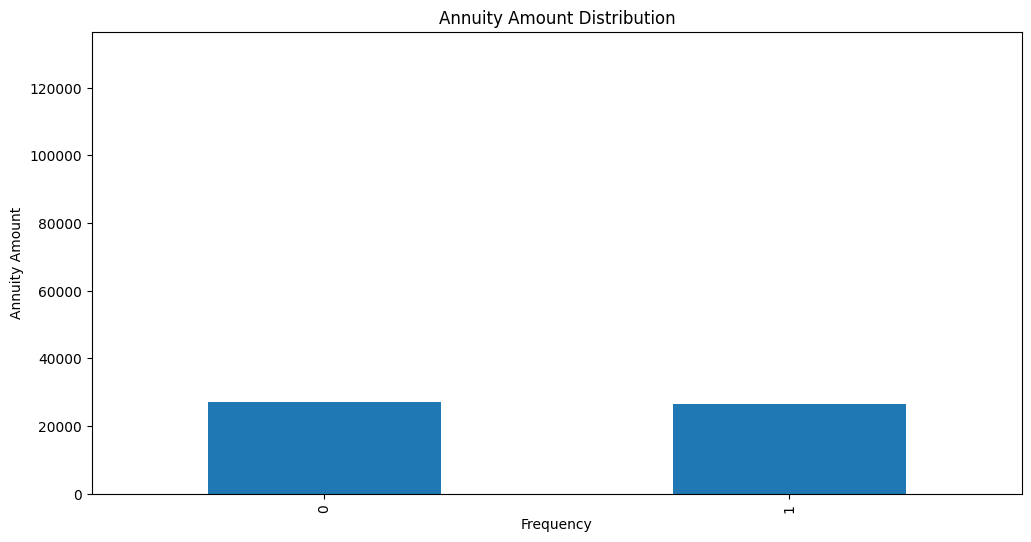

In [ ]:
plt.figure(figsize=(12, 6))
post.groupby('TARGET')['AMT_ANNUITY'].mean().plot(kind='bar')

sns.histplot(post['AMT_ANNUITY'], bins=20, kde=True)
plt.title('Annuity Amount Distribution')
plt.ylabel('Annuity Amount')
plt.xlabel('Frequency')
plt.show()

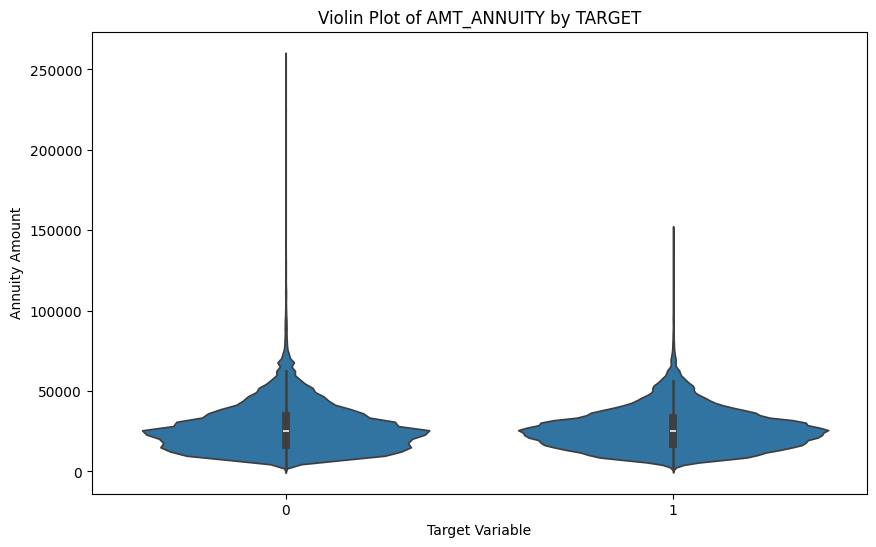

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='TARGET', y='AMT_ANNUITY', data=post)
plt.title('Violin Plot of AMT_ANNUITY by TARGET')
plt.xlabel('Target Variable')
plt.ylabel('Annuity Amount')
plt.show()


In [ ]:
# t-tests for AMT_CREDIT against other relevant variables
variables_for_ttest = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'DAYS_EMPLOYED']

for var in variables_for_ttest:
    group1 = post[post['TARGET'] == 0][var]
    group2 = post[post['TARGET'] == 1][var]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    print(f"T-test for AMT_CREDIT vs {var}:")
    print(f"  T-statistic: {t_stat}")
    print(f"  P-value: {p_value}")
    print("-" * 20)



T-test for AMT_CREDIT vs AMT_INCOME_TOTAL:
  T-statistic: 2.2081011084695983
  P-value: 0.027237960879677118
--------------------
T-test for AMT_CREDIT vs AMT_ANNUITY:
  T-statistic: nan
  P-value: nan
--------------------
T-test for AMT_CREDIT vs AMT_GOODS_PRICE:
  T-statistic: nan
  P-value: nan
--------------------
T-test for AMT_CREDIT vs CNT_CHILDREN:
  T-statistic: -10.64189504948037
  P-value: 1.9224915502038074e-26
--------------------
T-test for AMT_CREDIT vs DAYS_EMPLOYED:
  T-statistic: 24.94136608089604
  P-value: 3.6311730828848897e-137
--------------------


In [234]:
# correlation coefficients between 'AMT_CREDIT' and other numerical variables
numerical_cols = post.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if col != 'AMT_CREDIT' and col != 'TARGET':  # Exclude 'AMT_CREDIT' and 'TARGET' itself
        correlation = post['AMT_CREDIT'].corr(post[col])
        print(f"Correlation between AMT_CREDIT and {col}: {correlation}")


Correlation between AMT_CREDIT and SK_ID_CURR: -0.00034316120624785715
Correlation between AMT_CREDIT and CNT_CHILDREN: 0.0021454434616763416
Correlation between AMT_CREDIT and AMT_INCOME_TOTAL: 0.15687027185193095
Correlation between AMT_CREDIT and AMT_ANNUITY: 0.7701380033118824
Correlation between AMT_CREDIT and AMT_GOODS_PRICE: 0.9869683054221501
Correlation between AMT_CREDIT and REGION_POPULATION_RELATIVE: 0.09973787576226029
Correlation between AMT_CREDIT and DAYS_BIRTH: -0.055435947014526185
Correlation between AMT_CREDIT and DAYS_EMPLOYED: -0.06683834093092188
Correlation between AMT_CREDIT and DAYS_REGISTRATION: 0.009621325617372911
Correlation between AMT_CREDIT and DAYS_ID_PUBLISH: -0.006574774427157878
Correlation between AMT_CREDIT and OWN_CAR_AGE: -0.09419071925702023
Correlation between AMT_CREDIT and FLAG_MOBIL: 0.001435572992417004
Correlation between AMT_CREDIT and FLAG_EMP_PHONE: 0.0655185936551337
Correlation between AMT_CREDIT and FLAG_WORK_PHONE: -0.0210845993291